# Colorado Elections - Statewide Senator 2020


# Data Sources

Shapefiles:

  * https://opendata.fcgov.com/High-Performing-Government/District-Precincts-Map/kjv4-74f4
  * https://www.coloradoview.org/colorado-gis/
  * https://catalog.data.gov/dataset/tiger-line-shapefile-2012-2010-state-colorado-2010-census-voting-district-state-based-vtd

Election Results:

  * https://www.sos.state.co.us/pubs/elections/Results/Archives.html

Registered Voters:

  * http://coloradovoters.info/download.html

General Data:

  * https://demography.dola.colorado.gov/data/
  * https://demography.dola.colorado.gov
  * https://www.cde.state.co.us/stateinfo/qggovtstatistics


From these data sources I want to create a number of well organized dataframes. Unfortunately the precinct level data is not statewide... it is done by county. So what data do I want?

# Precincts

In [1]:
counties_filename = "../data/colorado_counties.txt"
counties = []
county_fips = dict()
with open(counties_filename) as file:
    for line in file:
        fips_county = line.split()[0][2:]
        county_name = ' '.join(line.split()[1:-1]).lower()
        counties.append(county_name)
        county_fips[fips_county] = county_name

In [2]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

In [3]:
filename = "../data/tl_2012_08_vtd10/tl_2012_08_vtd10.shp"
precincts_co_2012 = gpd.read_file(filename)

rename = {label: label.lower() for label in list(precincts_co_2012.columns)}
precincts_co_2012 = precincts_co_2012.rename(columns=rename)

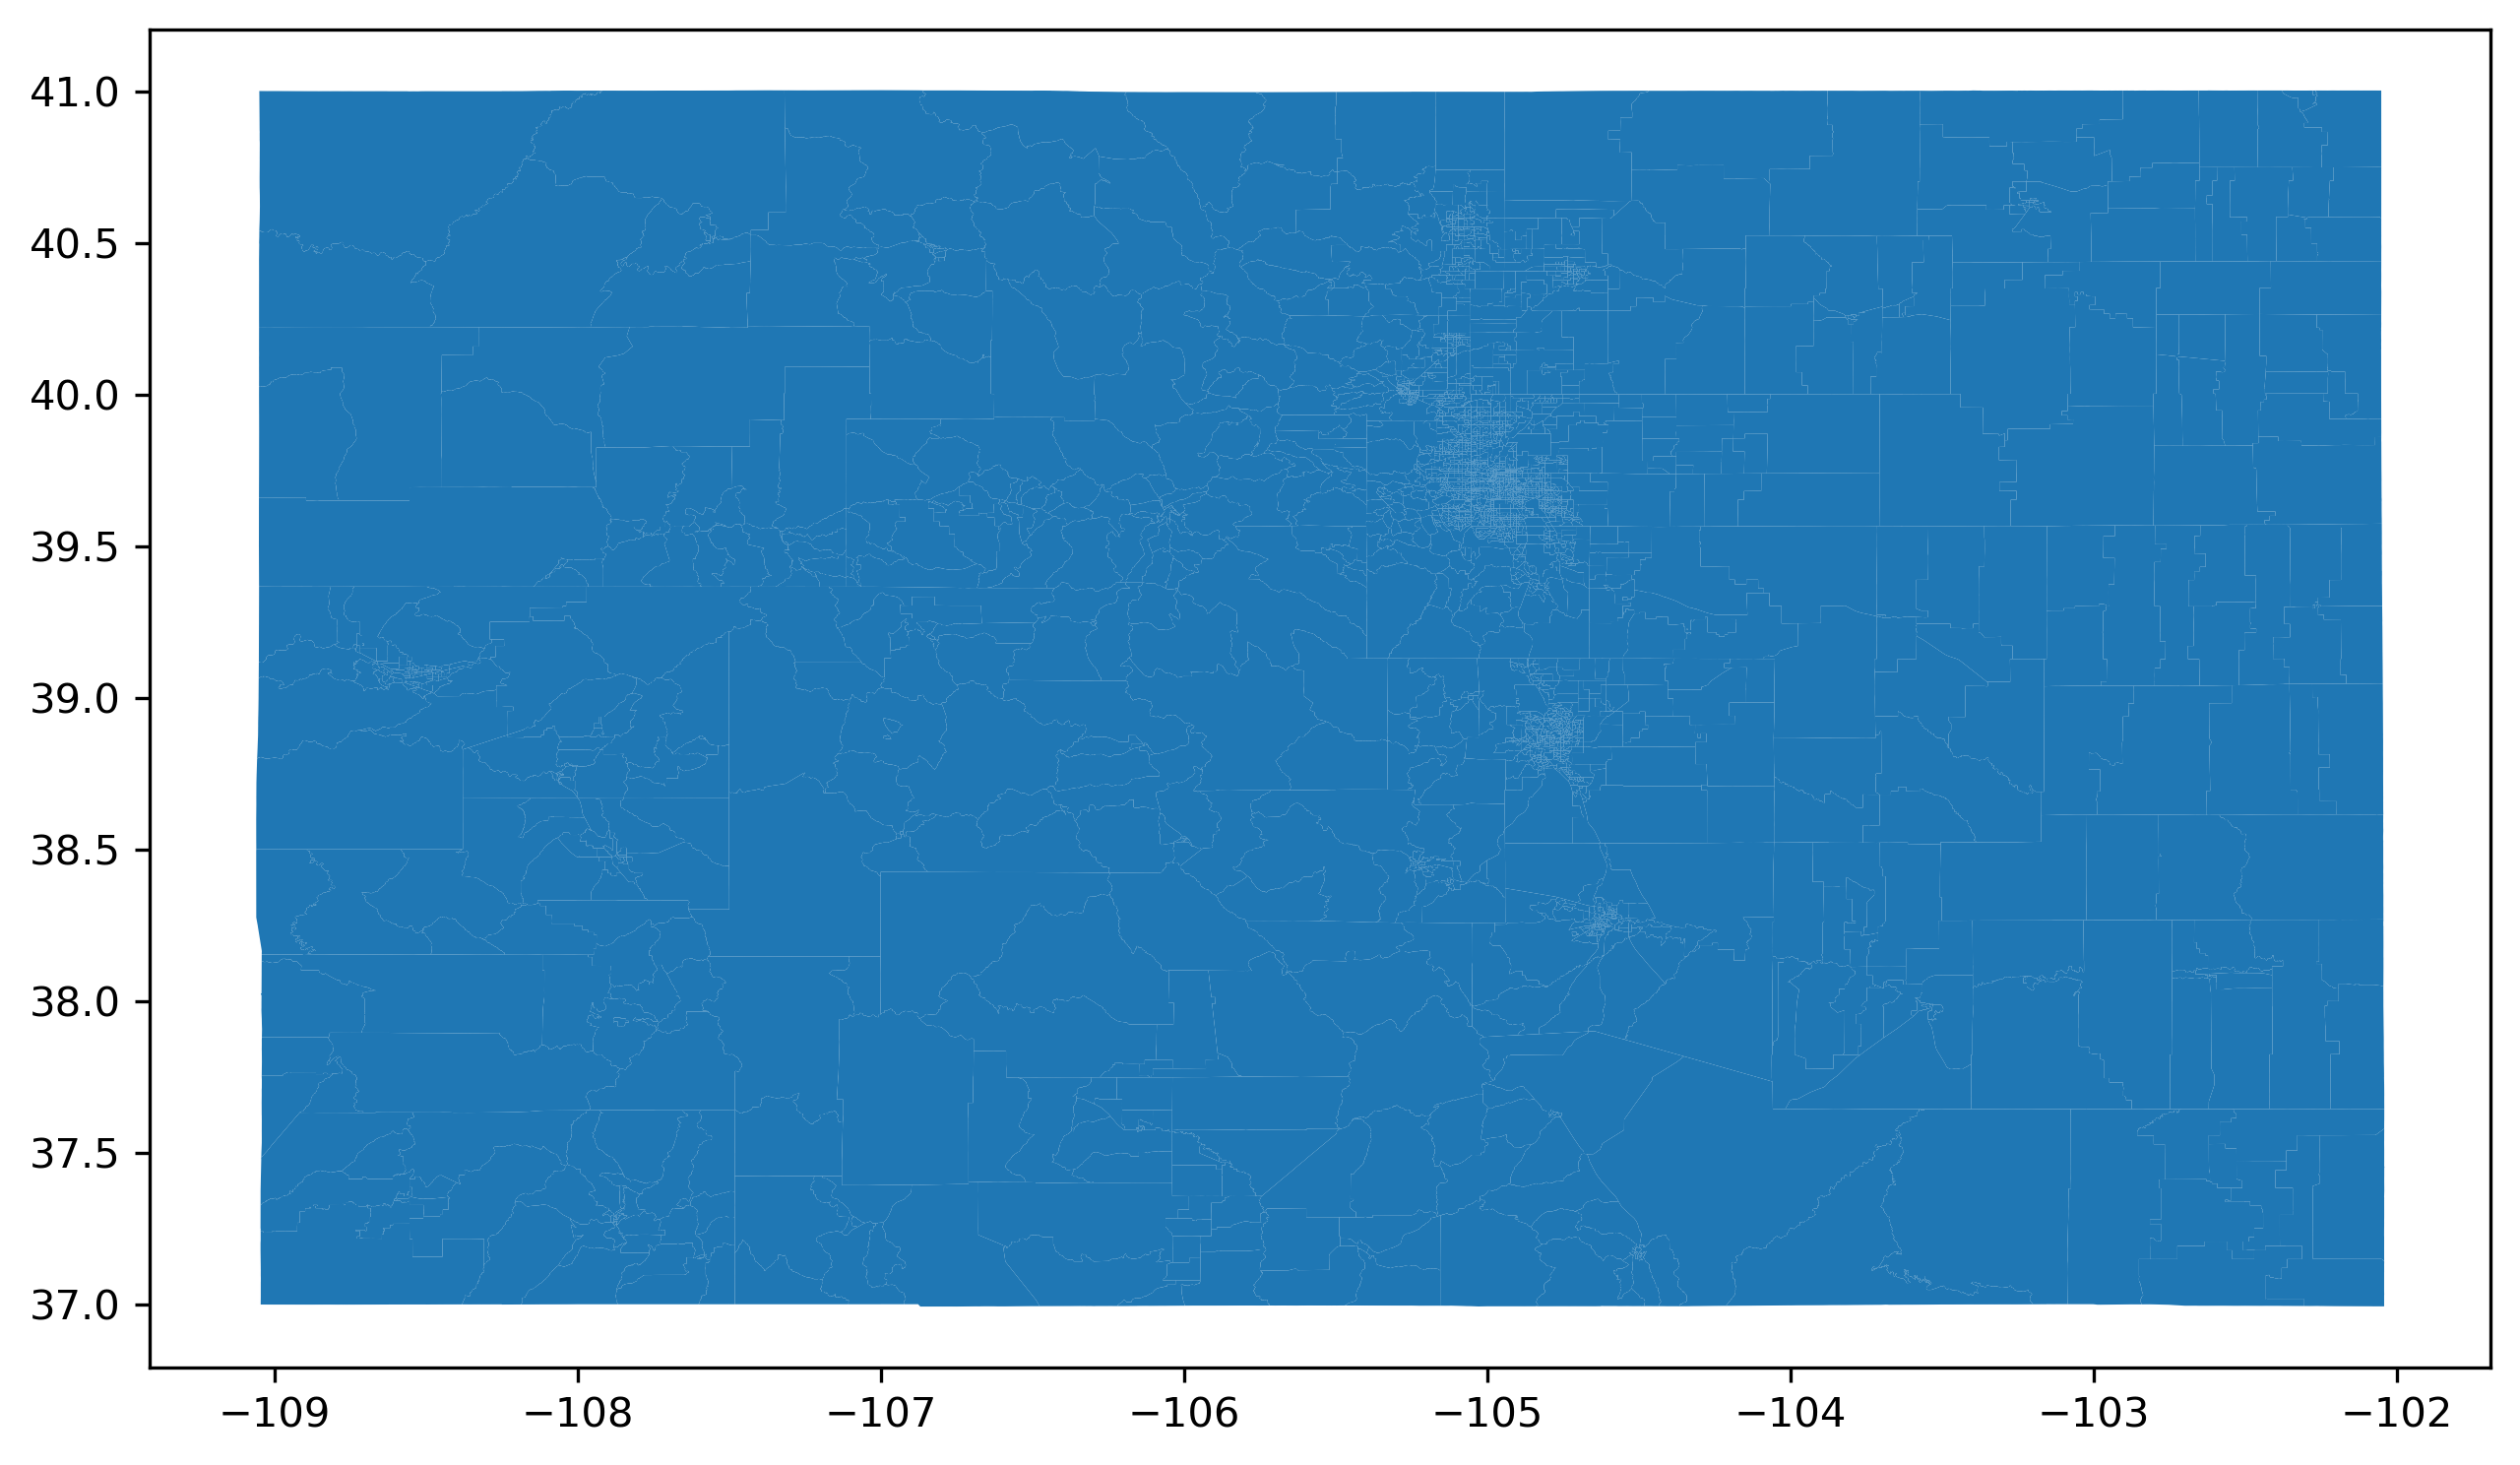

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12,6), dpi=300)
precincts_co_2012.plot(ax=ax, facecolor=None)

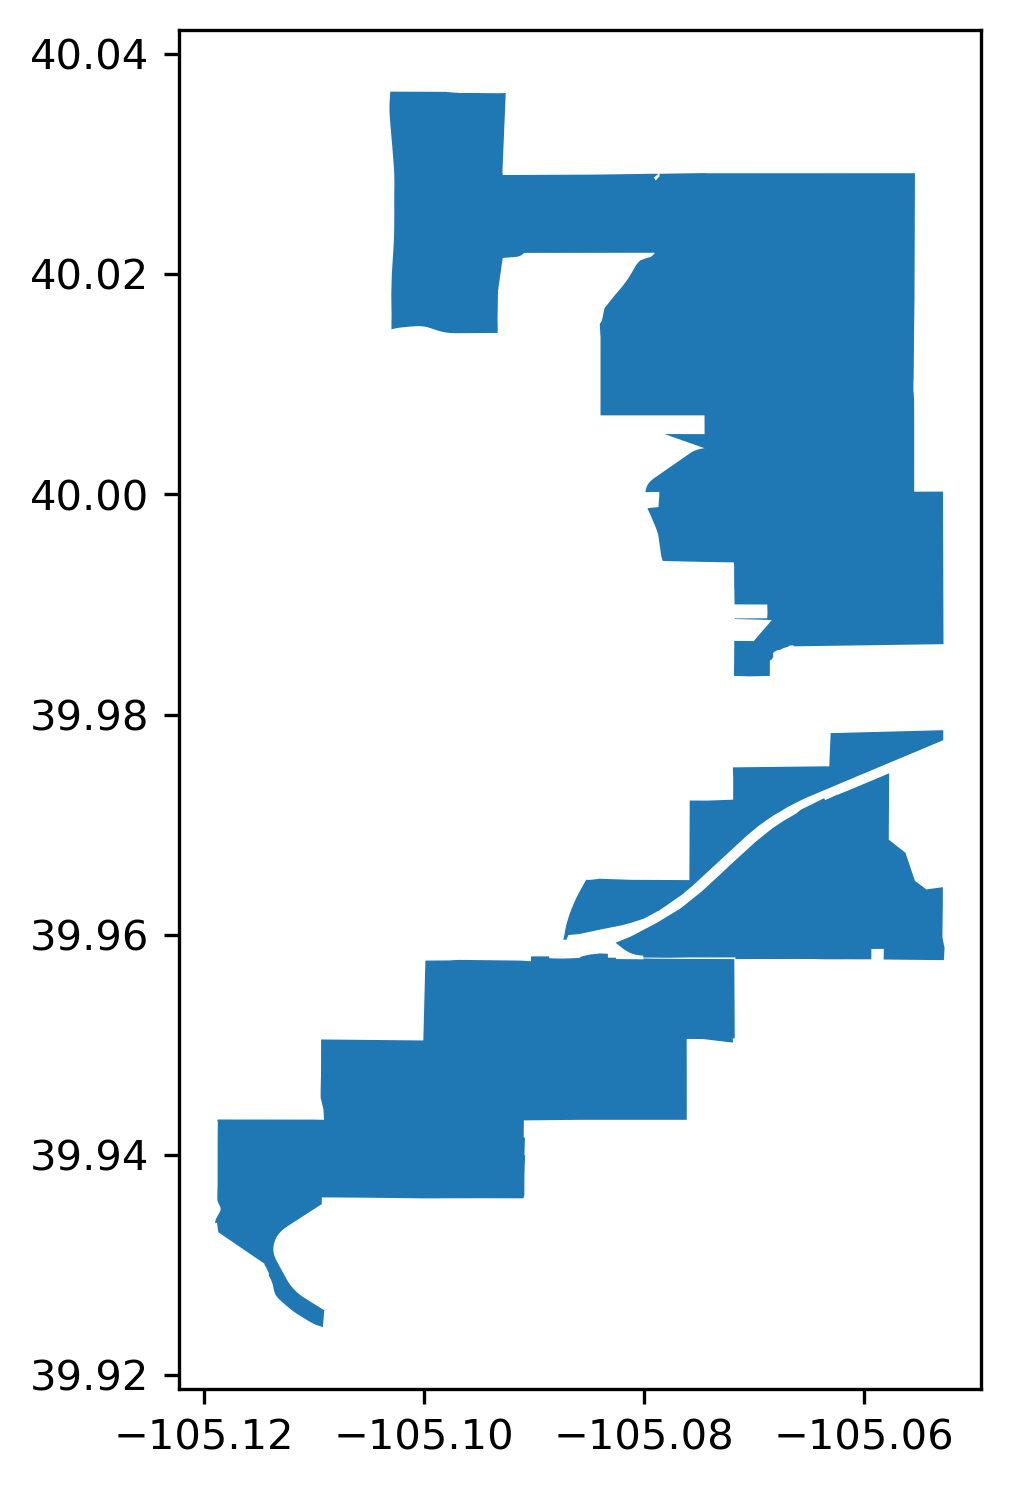

In [7]:
from functools import partial

def has_substring(var, substring=None):
    return substring in var.lower()

boulder = precincts_co_2012[precincts_co_2012.name10.apply(partial(has_substring, substring='boulder'))]

fig, ax = plt.subplots(1, 1, figsize=(12,6), dpi=300)
boulder.iloc[0:1].plot(ax=ax, facecolor=None)

In [8]:
def find_county_name(var):
    for county in counties:
        if county in var:
            return county
    print(f"NO COUNTY FOUND, {var}")
    return 'NoCounty'

precincts_co_2012['county'] = precincts_co_2012.countyfp10.apply(lambda x: county_fips[x])

In [9]:
num_precincts = dict()
for county in counties:
    num_precincts[county] = len(gdf[gdf.county == county])

NameError: name 'gdf' is not defined

In [10]:
len(boulder)

234

In [ ]:
set(boulder.geoid10.values)

In [ ]:
num_precincts

In [ ]:
len(precincts_co_2012)

In [ ]:
county_fips

# Election Results

Redrawing of the precincts is straight up evil

In accordance with Colorado Statutes, each election precinct must be numbered with a ten-digit number as follows:
  * First digit – Congressional District
  * Second and third digits – State Senate District
  * Fourth and fifth digits – State Representative District
  * Sixth and seventh digits – County Number
  * Last three digits – Precinct
  
Example: Precinct Number 3055415001
  * 3 Congressional District
  * 05 State Senate District
  * 54 State Representative District
  * 15 Assigned to Delta County by the Secretary of State
  * 001 Precinct

In [ ]:
import pandas as pd

filename = "../data/2018GEPrecinctLevelResults.xlsx"
election_res_2018 = pd.read_excel(filename)

In [ ]:
election_res_2018[election_res_2018.County == 'Boulder']

In [ ]:
len(set(election_res_2018.Precinct.values))

In [ ]:
filename = "../data/2012GeneralPrecinctLevelResults.xlsx"
election_res_2012 = pd.read_excel(filename)

In [ ]:
election_res_2012.head(50000)

In [ ]:
len(set(election_res_2012.Precinct.values))

In [ ]:
set(election_res_2018[election_res_2018.County == 'Boulder'].Precinct.values)

In [ ]:
boulder.iloc[0:1]

In [ ]:
boulder_precincts = gpd.read_file("../data/Boulder_Precincts/Precincts.shp")

In [ ]:
boulder_precincts.plot()

In [ ]:
boulder_precincts.head()